In [86]:
import numpy as np
import matplotlib.pyplot as plt

def highlight_max_confidence(ax, data, label):
    max_index = np.argmax(data)
    max_value = data[max_index]
    # Highlight the max value region in red
    ax.fill_between(range(len(data)), 0, max_value, where=(data == max_value), color='red', alpha=0.3, label='Max Value Region')
    # Annotate the max value
    ax.annotate(f"max: {max_value:.2f}", xy=(max_index, max_value), xytext=(max_index, max_value + 0.1), arrowprops=dict(facecolor='black', shrink=0.05),)
    # Plot the data with confidence area
    ax.plot(range(len(data)), data, label=label)
    ax.fill_between(range(len(data)), data - 0.1, data + 0.1, color='gray', alpha=0.3, label='Confidence Area')

def simulate_ecosystem(gender_ratio_variation):
    if gender_ratio_variation == 'equal':
        initial_ratio = 0.5
    elif gender_ratio_variation == 'male_dominant':
        initial_ratio = 0.8
    elif gender_ratio_variation == 'female_dominant':
        initial_ratio = 0.2
    else:
        raise ValueError("Invalid gender ratio variation")
    
    generations = 50
    gender_ratio = np.zeros(generations)
    gender_ratio[0] = initial_ratio
    predator_population = np.ones(generations)
    reproductive_success = np.ones(generations)
    food_resources = np.ones(generations)
    parasite_population = np.ones(generations)
    other_predator_population = np.ones(generations)
    prey_population = np.ones(generations)
    fishery_yield = np.ones(generations)
    composite_indicator = np.zeros(generations)
    
    for gen in range(1, generations):
        gender_ratio[gen] = gender_ratio[gen - 1]
        reproductive_success[gen] = reproductive_success[gen - 1] - 0.005 * abs(gender_ratio[gen] - 0.5)
        predator_population[gen] = predator_population[gen - 1] * reproductive_success[gen]
        food_resources[gen] = food_resources[gen - 1] - 0.02
        parasite_population[gen] = parasite_population[gen - 1] + np.random.normal(loc=0, scale=0.1)
        other_predator_population[gen] = other_predator_population[gen - 1] + 0.1 * predator_population[gen] - 0.05 * food_resources[gen]
        prey_population[gen] = prey_population[gen - 1] - 0.1 * other_predator_population[gen]
        fishery_yield[gen] = fishery_yield[gen - 1] + 0.15 * (1 - gender_ratio[gen]) * food_resources[gen]
        composite_indicator[gen] = 0.4 * gender_ratio[gen] + 0.3 * predator_population[gen] + 0.2 * reproductive_success[gen] + 0.1 * food_resources[gen]

    return composite_indicator, parasite_population, other_predator_population, prey_population, fishery_yield

# Usage
def evaluate_population(gender_ratio_variation):
    composite_indicator, parasite_population, other_predator_population, prey_population, fishery_yield = simulate_ecosystem(gender_ratio_variation)
    
    # Visualize results
    generations = np.arange(50)
    plt.figure(figsize=(12, 16))

    # Plot composite indicator dynamics
    plt.subplot(6, 1, 1)
    highlight_max_confidence(plt, composite_indicator, label='Composite Indicator')
    plt.title(f'Composite Indicator Dynamics - {gender_ratio_variation.capitalize()} Gender Ratio Variation')
    plt.xlabel('Generations')
    plt.ylabel('Composite Indicator')
    plt.legend()

    # Plot parasite population dynamics
    plt.subplot(6, 1, 2)
    highlight_max_confidence(plt, parasite_population, label='Parasite Population')
    plt.title(f'Parasite Population Dynamics - {gender_ratio_variation.capitalize()} Gender Ratio Variation')
    plt.xlabel('Generations')
    plt.ylabel('Parasite Population')
    plt.legend()

    # Plot other predator population dynamics
    plt.subplot(6, 1, 3)
    highlight_max_confidence(plt, other_predator_population, label='Other Predator Population')
    plt.title(f'Other Predator Population Dynamics - {gender_ratio_variation.capitalize()} Gender Ratio Variation')
    plt.xlabel('Generations')
    plt.ylabel('Other Predator Population')
    plt.legend()

    # Plot prey population dynamics
    plt.subplot(6, 1, 4)
    highlight_max_confidence(plt, prey_population, label='Prey Population')
    plt.title(f'Prey Population Dynamics - {gender_ratio_variation.capitalize()} Gender Ratio Variation')
    plt.xlabel('Generations')
    plt.ylabel('Prey Population')
    plt.legend()

    """
    # Plot fishery yield dynamics
    plt.subplot(6, 1, 5)
    highlight_max_confidence(plt, fishery_yield, label='Fishery Yield')
    plt.title(f'Fishery Yield Dynamics - {gender_ratio_variation.capitalize()} Gender Ratio Variation')
    plt.xlabel('Generations')
    plt.ylabel('Fishery Yield')
    plt.legend()
    """
    plt.tight_layout()
    plt.show()


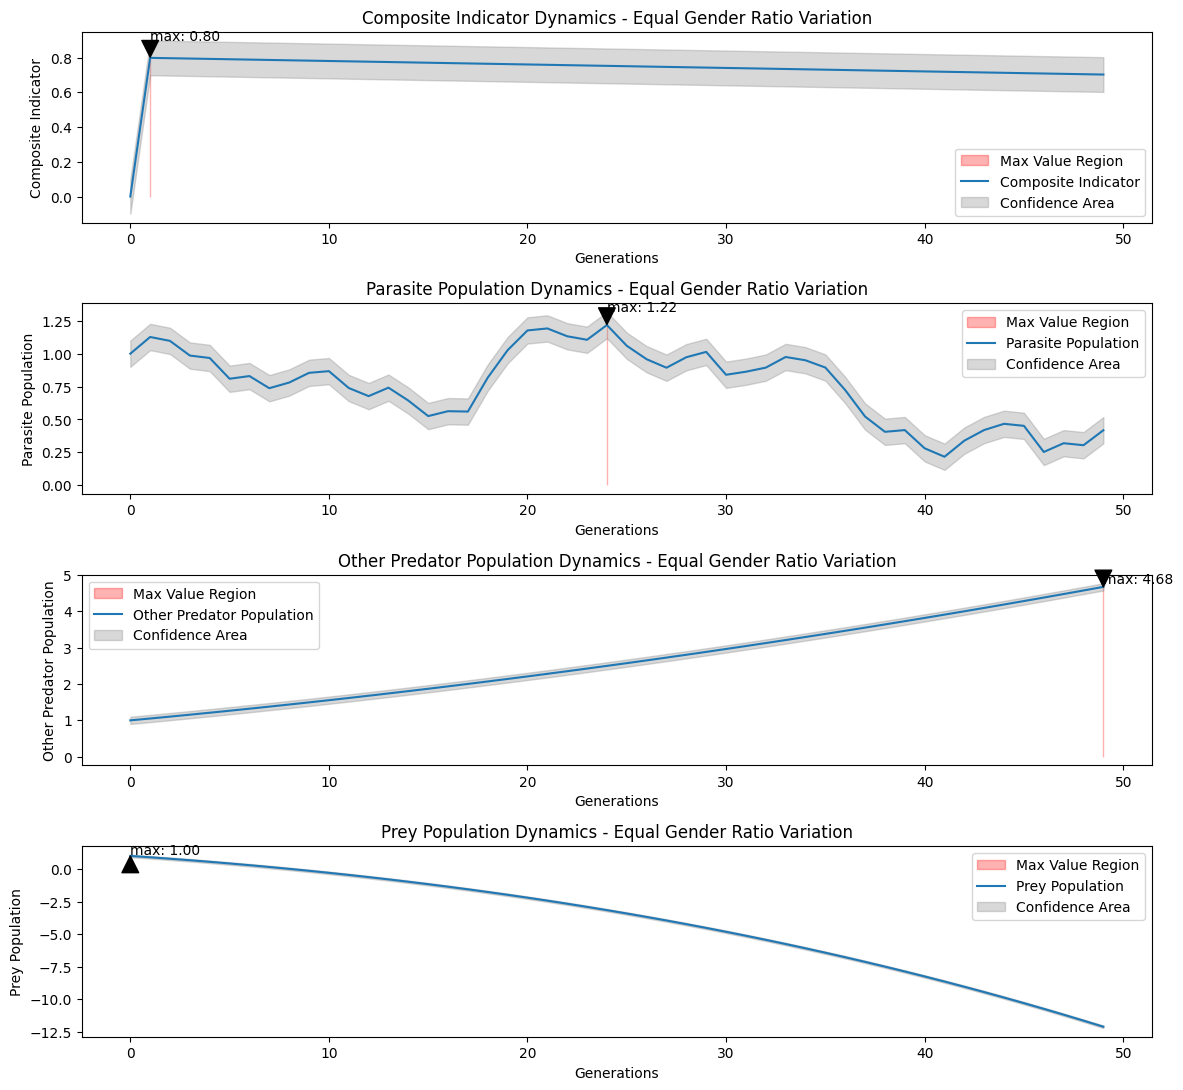

In [87]:
# Simulate equal gender ratio scenario
evaluate_population('equal')

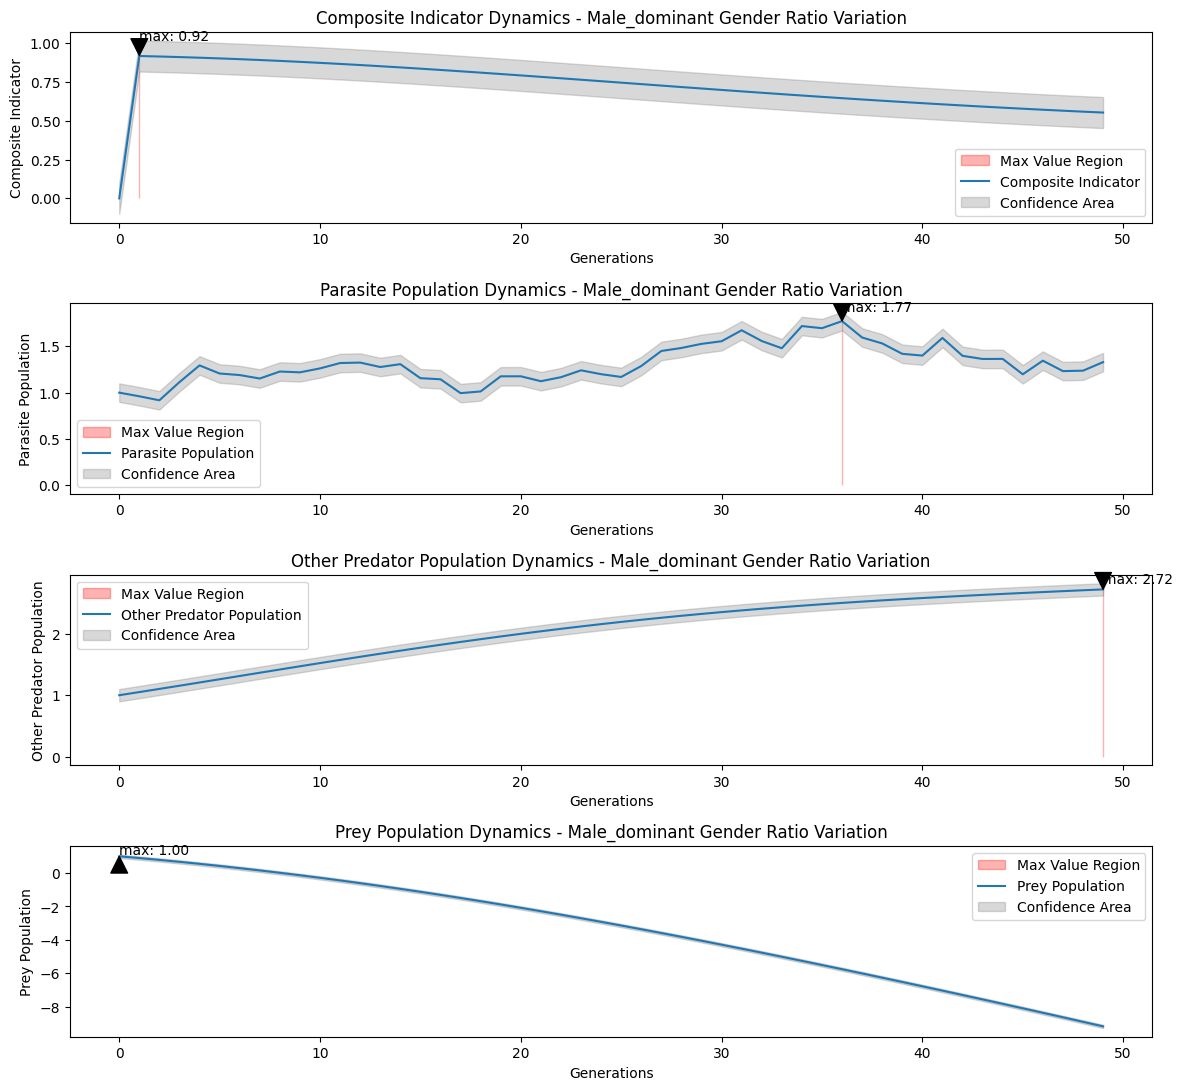

In [88]:
# Simulate male-dominant gender ratio scenario
evaluate_population('male_dominant')

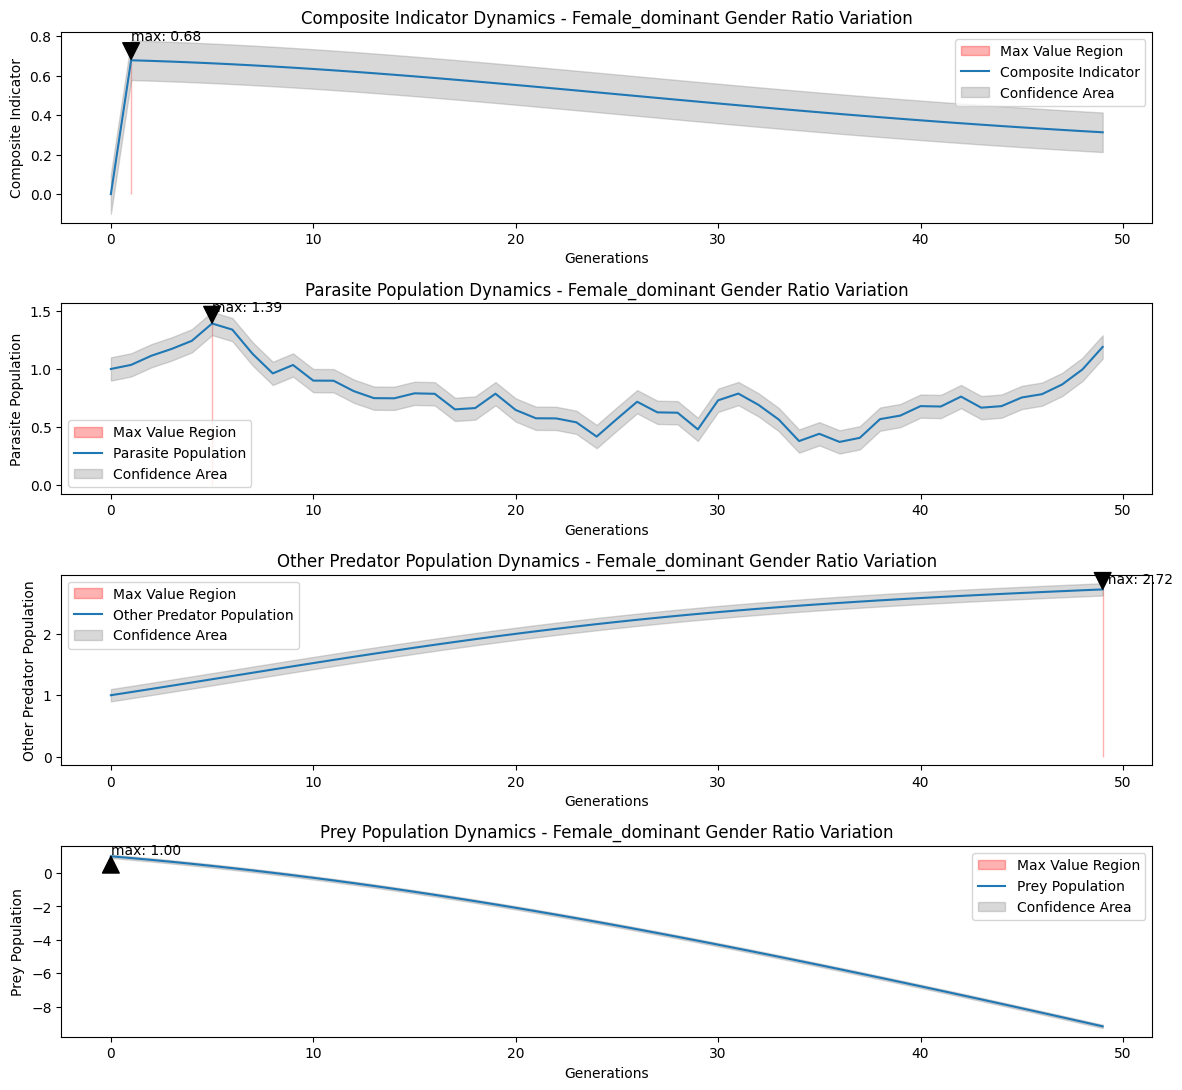

In [89]:
# Simulate female-dominant gender ratio scenario
evaluate_population('female_dominant')


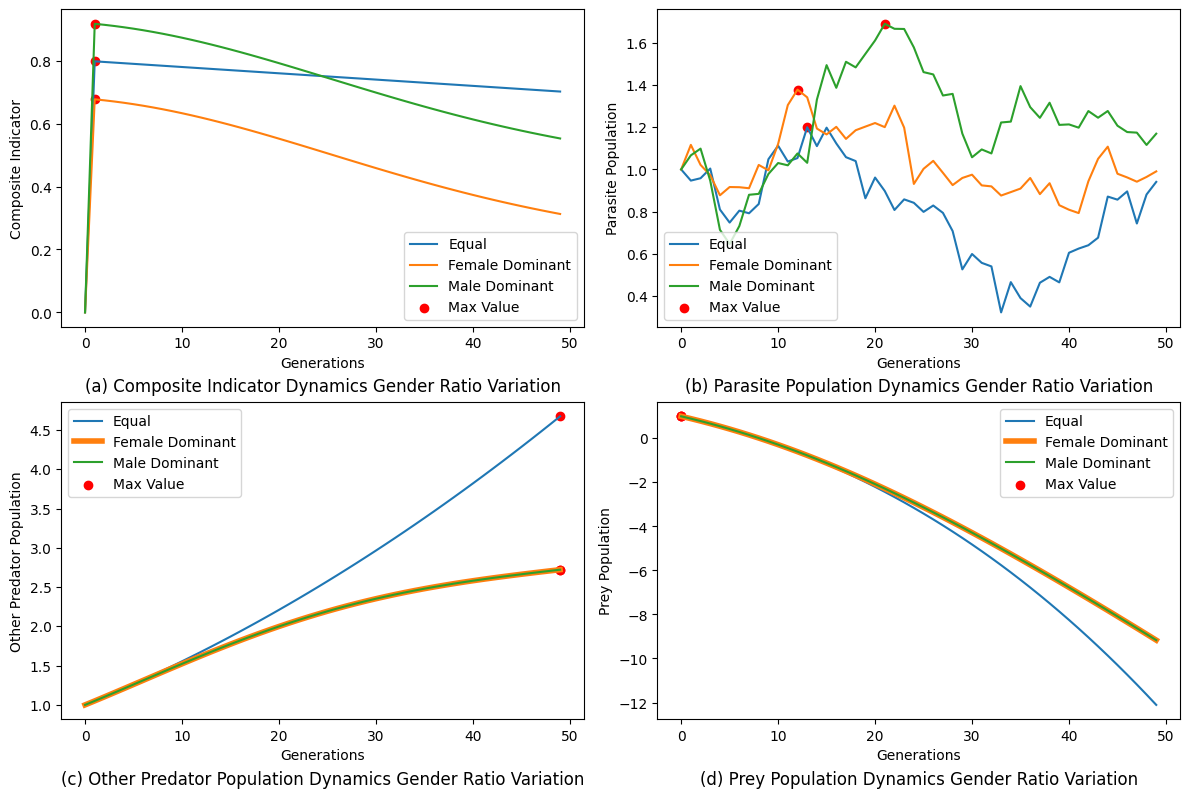

In [90]:

# Assuming your simulate_ecosystem function returns the required data
composite_indicator, parasite_population, other_predator_population, prey_population, fishery_yield = simulate_ecosystem("equal")
composite_indicator_1, parasite_population_1, other_predator_population_1, prey_population_1, fishery_yield_1 = simulate_ecosystem("female_dominant")
composite_indicator_2, parasite_population_2, other_predator_population_2, prey_population_2, fishery_yield_2 = simulate_ecosystem("male_dominant")

# Visualize results
generations = np.arange(50)
plt.figure(figsize=(12, 8))

# Plot composite indicator dynamics
plt.subplot(2, 2, 1)
plt.plot(generations, composite_indicator, label='Equal')
plt.plot(generations, composite_indicator_1, label='Female Dominant')
plt.plot(generations, composite_indicator_2, label='Male Dominant')
plt.scatter(np.argmax(composite_indicator), np.max(composite_indicator), color='red', marker='o', label='Max Value')
plt.scatter(np.argmax(composite_indicator_1), np.max(composite_indicator_1), color='red', marker='o')
plt.scatter(np.argmax(composite_indicator_2), np.max(composite_indicator_2), color='red', marker='o')
plt.title(f'(a) Composite Indicator Dynamics Gender Ratio Variation',y=-0.23)
plt.xlabel('Generations')
plt.ylabel('Composite Indicator')
plt.legend()

# Plot parasite population dynamics
plt.subplot(2, 2, 2)
plt.plot(generations, parasite_population, label='Equal')
plt.plot(generations, parasite_population_1, label='Female Dominant')
plt.plot(generations, parasite_population_2, label='Male Dominant')
plt.scatter(np.argmax(parasite_population), np.max(parasite_population), color='red', marker='o', label='Max Value')
plt.scatter(np.argmax(parasite_population_1), np.max(parasite_population_1), color='red', marker='o')
plt.scatter(np.argmax(parasite_population_2), np.max(parasite_population_2), color='red', marker='o')
plt.title(f'(b) Parasite Population Dynamics Gender Ratio Variation',y=-0.23)
plt.xlabel('Generations')
plt.ylabel('Parasite Population')
plt.legend()

# Plot other predator population dynamics
plt.subplot(2, 2, 3)
plt.plot(generations, other_predator_population, label='Equal')
plt.plot(generations, other_predator_population_1, label='Female Dominant',linewidth=4.0)
plt.plot(generations, other_predator_population_2, label='Male Dominant')
plt.scatter(np.argmax(other_predator_population), np.max(other_predator_population), color='red', marker='o', label='Max Value')
plt.scatter(np.argmax(other_predator_population_1), np.max(other_predator_population_1), color='red', marker='o')
plt.scatter(np.argmax(other_predator_population_2), np.max(other_predator_population_2), color='red', marker='o')
plt.title(f'(c) Other Predator Population Dynamics Gender Ratio Variation',y=-0.23)
plt.xlabel('Generations')
plt.ylabel('Other Predator Population')
plt.legend()

# Plot prey population dynamics
plt.subplot(2, 2, 4)
plt.plot(generations, prey_population, label='Equal')
plt.plot(generations, prey_population_1, label='Female Dominant',linewidth=4.0)
plt.plot(generations, prey_population_2, label='Male Dominant')
plt.scatter(np.argmax(prey_population), np.max(prey_population), color='red', marker='o', label='Max Value')
plt.scatter(np.argmax(prey_population_1), np.max(prey_population_1), color='red', marker='o')
plt.scatter(np.argmax(prey_population_2), np.max(prey_population_2), color='red', marker='o')
plt.title(f'(d) Prey Population Dynamics Gender Ratio Variation',y=-0.23)
plt.xlabel('Generations')
plt.ylabel('Prey Population')
plt.legend()

"""
# Plot fishery yield dynamics
plt.subplot(6, 2, 5)
plt.plot(generations, fishery_yield, label='Equal')
plt.plot(generations, fishery_yield_1, label='Female Dominant')
plt.plot(generations, fishery_yield_2, label='Male Dominant')
plt.scatter(np.argmax(fishery_yield), np.max(fishery_yield), color='red', marker='o', label='Max Value')
plt.scatter(np.argmax(fishery_yield_1), np.max(fishery_yield_1), color='red', marker='o')
plt.scatter(np.argmax(fishery_yield_2), np.max(fishery_yield_2), color='red', marker='o')
plt.title(f'Fishery Yield Dynamics Gender Ratio Variation')
plt.xlabel('Generations')
plt.ylabel('Fishery Yield')
plt.legend()
"""

plt.tight_layout()
plt.show()
